In [1]:
# FACTORS THAT CONTRIBUTE TO EMPLOYEE ATTRITION AT IBM

In [81]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import hvplot
import hvplot.pandas
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [3]:
# Load and display first few rows of the dataset
data = pd.read_csv('IBM.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# Check number of rows and Columns
num_rows, num_cols = data.shape
print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)

Number of rows:  1470
Number of columns:  35


In [5]:
# Summary statistics of the dataset
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [6]:
# Check the data types of each column
print(data.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# Check for missing values
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# check number of unique values in each variable
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")
    print("----------------------------------------------")

Age: Number of unique values 43
----------------------------------------------
Attrition: Number of unique values 2
----------------------------------------------
BusinessTravel: Number of unique values 3
----------------------------------------------
DailyRate: Number of unique values 886
----------------------------------------------
Department: Number of unique values 3
----------------------------------------------
DistanceFromHome: Number of unique values 29
----------------------------------------------
Education: Number of unique values 5
----------------------------------------------
EducationField: Number of unique values 6
----------------------------------------------
EmployeeCount: Number of unique values 1
----------------------------------------------
EmployeeNumber: Number of unique values 1470
----------------------------------------------
EnvironmentSatisfaction: Number of unique values 4
----------------------------------------------
Gender: Number of unique values 2


In [9]:
# Drop features with a single number of unique values
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [10]:
# Descripive statistics for categorical features
object_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print(data[column].value_counts())
        print("------------------------------------")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------------------------------
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
------------------------------------
JobR

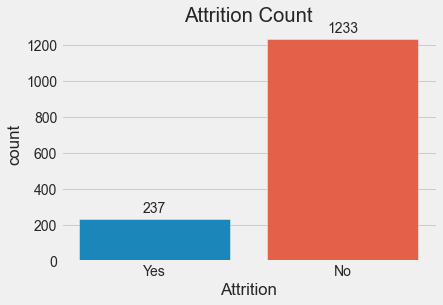

In [11]:
# Count plot of 'Attrition'
ax = sns.countplot(data=data, x='Attrition')

# Display the count values on the plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Attrition Count')
plt.savefig('attrition_count.png', dpi=300)  # Adjust the dpi value as needed
plt.show()

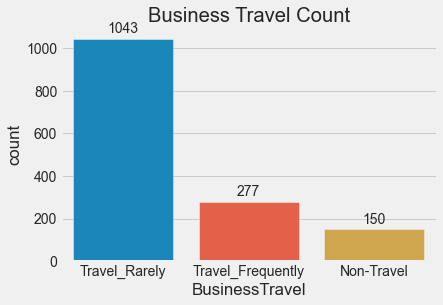

In [12]:
# Count plot of 'Business Travel'
ax = sns.countplot(data=data, x='BusinessTravel')

# Display the count values on the plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Business Travel Count')
plt.savefig('business_travel.png', dpi=300)  # Adjust the dpi value as needed
plt.show()

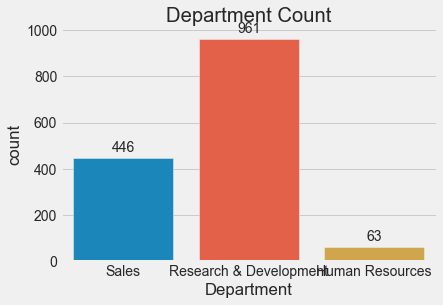

In [13]:
# Count plot of 'Department'
ax = sns.countplot(data=data, x='Department')

# Display the count values on the plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Department Count')
plt.savefig('department_count.png', dpi=300)  # Adjust the dpi value as needed
plt.show()

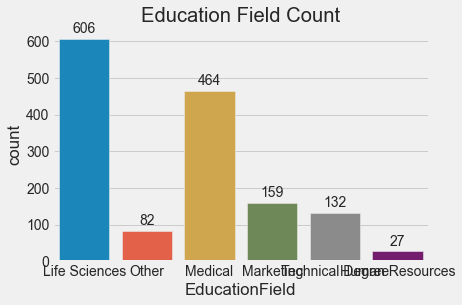

In [14]:
# Count plot of 'Education Field'
ax = sns.countplot(data=data, x='EducationField')

# Display the count values on the plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Education Field Count')
plt.savefig('education_field_count.png', dpi=300)  # Adjust the dpi value as needed
plt.show()

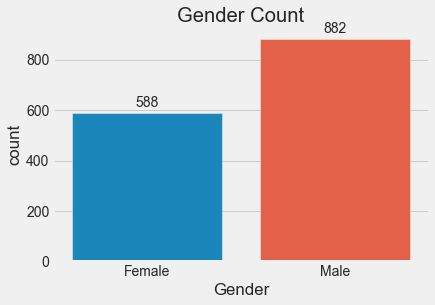

In [15]:
# Count plot of 'Gender'
ax = sns.countplot(data=data, x='Gender')

# Display the count values on the plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Gender Count')
plt.savefig('gender_count.png', dpi=300)  # Adjust the dpi value as needed
plt.show()

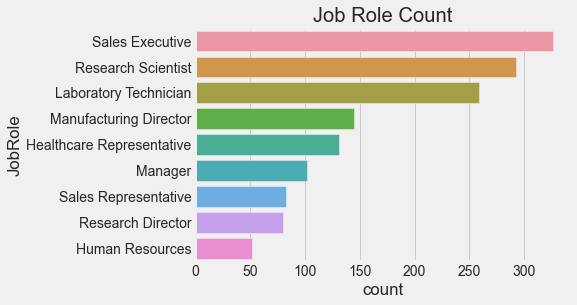

In [16]:
# Count plot of 'Job Role'
ax = sns.countplot(data=data, y='JobRole')

# Display the count values on the plot
#for p in ax.patches:
   # ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Job Role Count')
plt.savefig('job_role_count.png', dpi=300)  # Adjust the dpi value as needed
plt.show()

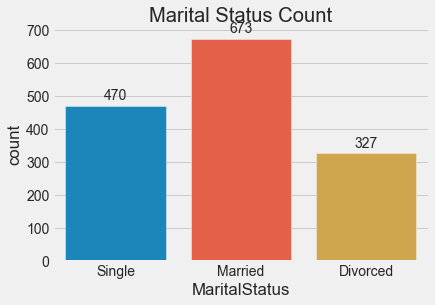

In [17]:
# Count plot of 'Marital Status'
ax = sns.countplot(data=data, x='MaritalStatus')

# Display the count values on the plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Marital Status Count')
plt.savefig('marital_status_count.png', dpi=300)  # Adjust the dpi value as needed
plt.show()

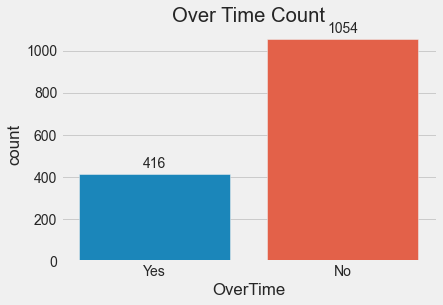

In [18]:
# Count plot of 'Over Time'
ax = sns.countplot(data=data, x='OverTime')

# Display the count values on the plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Over Time Count')
plt.savefig('over_time_count.png', dpi=300)  # Adjust the dpi value as needed
plt.show()

In [57]:
# Coding categorical variables

# Attrition
data['Attrition'].replace('Yes',1, inplace=True)
data['Attrition'].replace('No',0, inplace=True)

# Job Role
data['JobRole'].replace('Healthcare Representative',1, inplace=True)
data['JobRole'].replace('Human Resources',2, inplace=True)
data['JobRole'].replace('Laboratory Technician',3, inplace=True)
data['JobRole'].replace('Manager',4, inplace=True)
data['JobRole'].replace('Manufacturing Director',5, inplace=True)
data['JobRole'].replace('Research Director',6, inplace=True)
data['JobRole'].replace('Research Scientist',7, inplace=True)
data['JobRole'].replace('Sales Executive',8, inplace=True)
data['JobRole'].replace('Sales Representative',9, inplace=True)

# Department
data['Department'].replace('Human Resources',1, inplace=True)
data['Department'].replace('Research & Development',2, inplace=True)
data['Department'].replace('Sales',3, inplace=True)

# Business Travel
data['BusinessTravel'].replace('Non-Travel',1, inplace=True)
data['BusinessTravel'].replace('Travel_Rarely',2, inplace=True)
data['BusinessTravel'].replace('Travel_Frequently',3, inplace=True)

# Education Field
data['EducationField'].replace('Human Resources',1, inplace=True)
data['EducationField'].replace('Life Sciences',2, inplace=True)
data['EducationField'].replace('Marketing',3, inplace=True)
data['EducationField'].replace('Medical',4, inplace=True)
data['EducationField'].replace('Other',5, inplace=True)
data['EducationField'].replace('Technical Degree',6, inplace=True)

# Gender
data['Gender'].replace('Male',1, inplace=True)
data['Gender'].replace('Female',2, inplace=True)

# Marital Status
data['MaritalStatus'].replace('Divorced',1, inplace=True)
data['MaritalStatus'].replace('Married',2, inplace=True)
data['MaritalStatus'].replace('Single',3, inplace=True)

# Over Time
data['OverTime'].replace('Yes',1, inplace=True)
data['OverTime'].replace('No',2, inplace=True)


In [55]:
# Specified variable Versus attrition
data.hvplot.hist(y='OverTime', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [OverTime]   (OverTime_count)

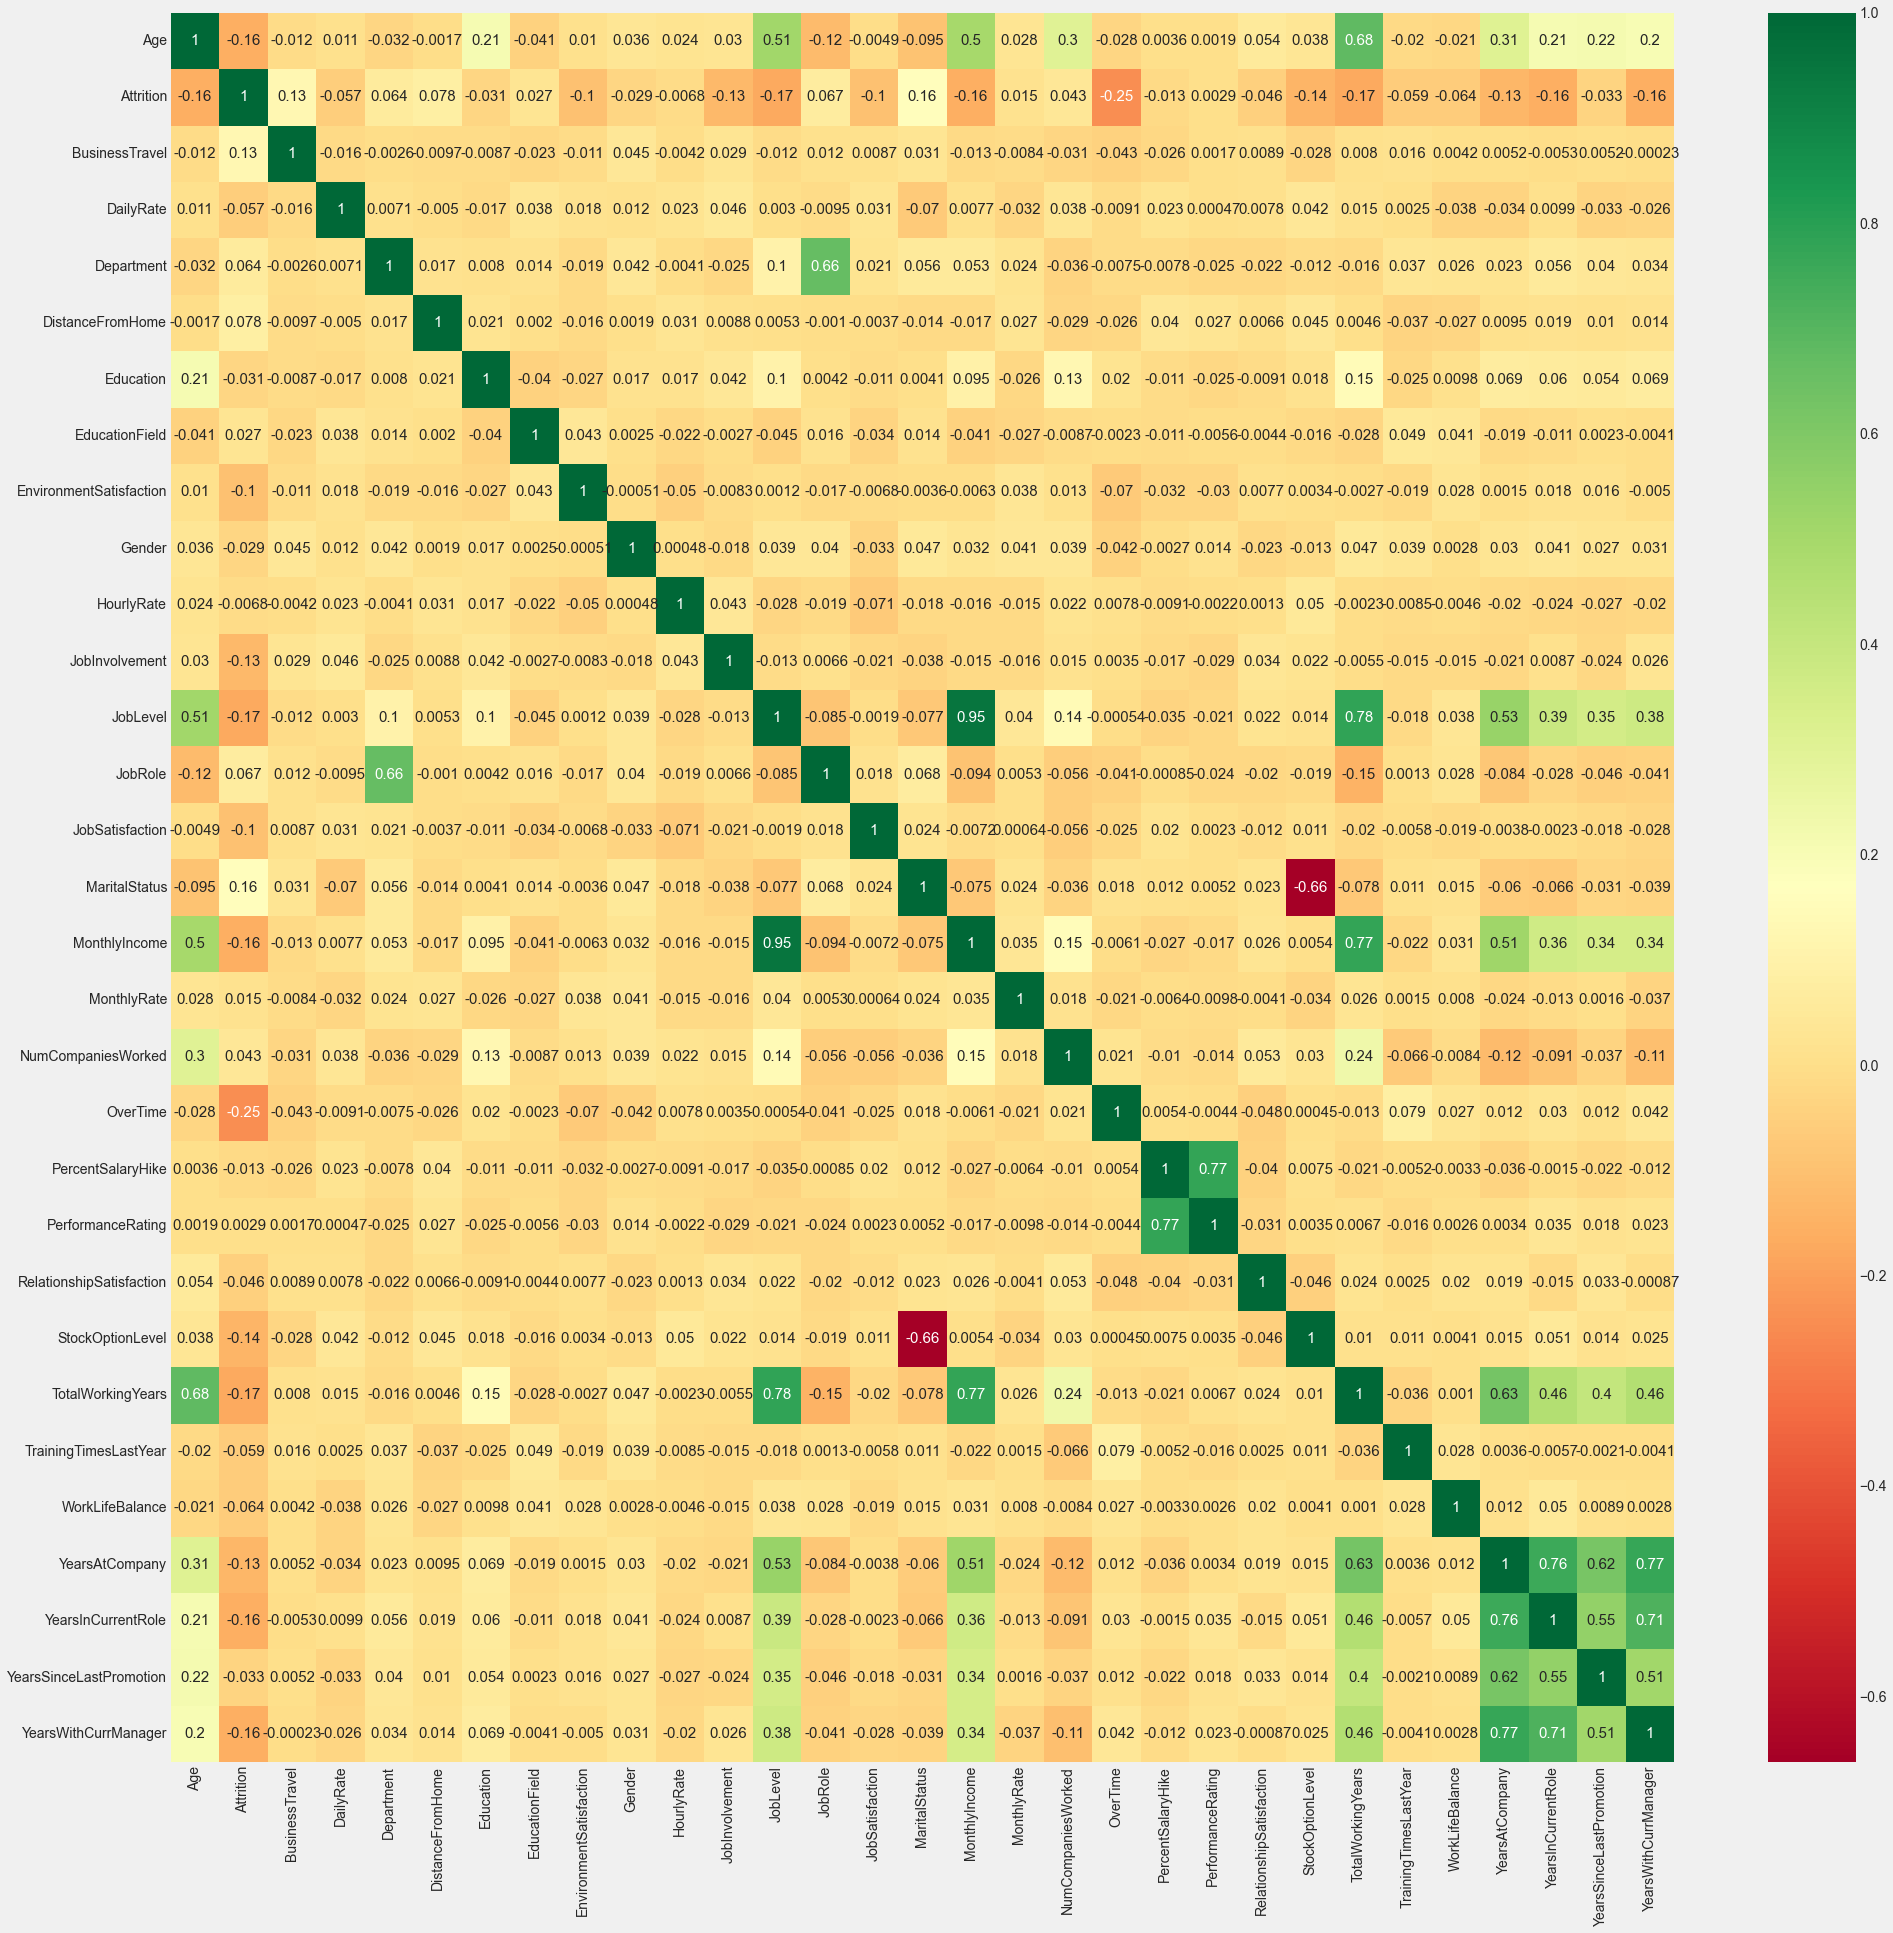

In [59]:
# correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.savefig('correlation_matrix.png', dpi=300)  # Adjust the dpi value as needed

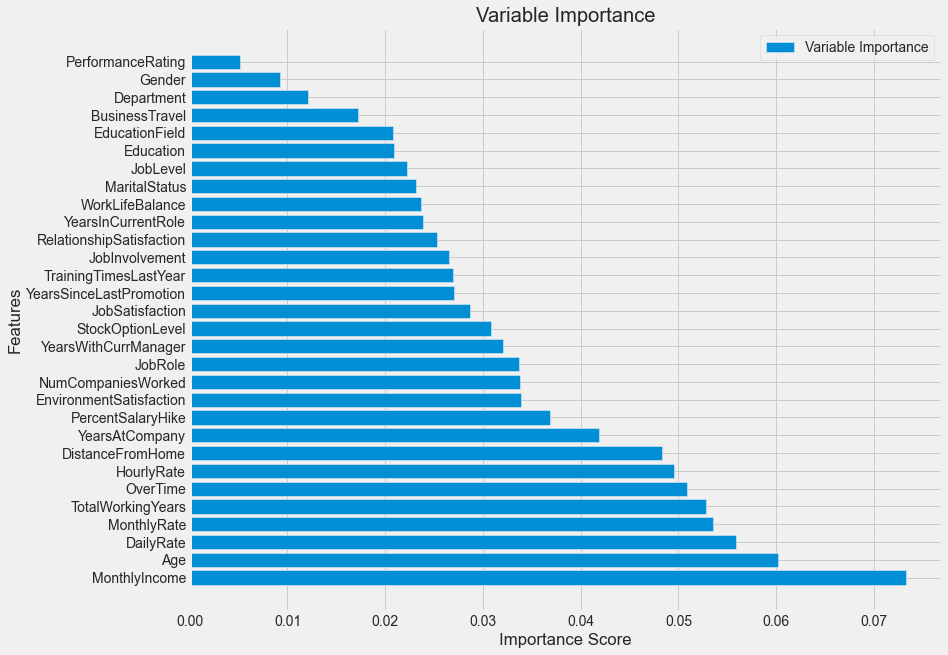

<Figure size 432x288 with 0 Axes>

In [75]:
# Feature Engineering - Random Forest Variable selection Algorithm

# Separate the features (X) and the target variable (y)
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# initialize Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the model
rf_classifier.fit(X,y)

# Get the feature importance scores
feature_importances = rf_classifier.feature_importances_

# Sort the features and their importance scores in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = X.columns[sorted_indices]
sorted_scores = feature_importances[sorted_indices]

# Plot the feature importance
plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_scores)), sorted_scores, align='center')
plt.yticks(range(len(sorted_scores)), sorted_features)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Variable Importance')
plt.legend(['Variable Importance'])
plt.show()

# Adjust spacing between the bars and the y-axis labels
plt.subplots_adjust(left=0.5)

# save image to working directory
plt.savefig('feature_importance.png', dpi=300)

In [77]:
# Random forest - Attriton Prediction model

# Separate the features (X) and the target variable (y)
X = data[['MonthlyIncome', 'Age', 'DailyRate', 'MonthlyRate', 'TotalWorkingYears',
          'OverTime', 'HourlyRate','DistanceFromHome', 'YearsAtCompany',
          'PercentSalaryHike', 'EnvironmentSatisfaction', 'NumCompaniesWorked']]
y = data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with 100 cycles
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.13      0.20        39

    accuracy                           0.87       294
   macro avg       0.69      0.55      0.57       294
weighted avg       0.83      0.87      0.83       294



In [82]:
# Binary Logistic Regression Model

# Specify the dependent variable and predictor variables
y = data['Attrition']
X = data[['MonthlyIncome', 'Age', 'DailyRate', 'MonthlyRate', 'TotalWorkingYears',
          'OverTime', 'HourlyRate','DistanceFromHome', 'YearsAtCompany',
          'PercentSalaryHike', 'EnvironmentSatisfaction', 'NumCompaniesWorked']]  
# Add other predictor variables as needed

# Add a constant column to the predictor variables
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Output the regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.371088
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                           12
Date:                Mon, 03 Jul 2023   Pseudo R-squ.:                  0.1599
Time:                        19:29:12   Log-Likelihood:                -545.50
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.839e-38
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.8066      0.684      5.563      0.000       2.465   

D:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [79]:
# Create an instance of the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the attrition for the test set
y_pred = logreg.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



D:\Program_Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.